In [1]:
import pandas as pd
import json
import glob
import xml.etree.ElementTree as etree
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
filepath = '/Users/matthiashugli/Dropbox/bucket/sample-data/instat-october-2021-data.json'

with open(filepath) as f:
    data = json.load(f)
    df = pd.DataFrame(data['data']['row'])

# print(data['data']['row']) 


In [9]:
df.head()

,id,number,action_id,action_name,player_id,player_name,team_id,team_name,position_id,position_name,...,gate_y,direction,body_id,body_name,shot_type,touches,assistant_id,assistant_name,shot_handling,var_decision
0,20072,9,161000,Substitute player,263974,Aka Wilfried Kanga,359,Young Boys,100,Substitute player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20073,13,161000,Substitute player,200787,Nicolas Brice Moumi Ngamaleu,359,Young Boys,100,Substitute player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20074,32,161000,Substitute player,440220,Fabian Rieder,359,Young Boys,100,Substitute player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20075,15,161000,Substitute player,376894,Meschack Elia Lina,359,Young Boys,100,Substitute player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20088,11,161000,Substitute player,1089768,Brahima Ouattara,179,Lausanne Sport,100,Substitute player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['id', 'number', 'action_id', 'action_name', 'player_id', 'player_name',
       'team_id', 'team_name', 'position_id', 'position_name', 'half',
       'second', 'standart_id', 'standart_name', 'ts', 'dl', 'pos_x', 'pos_y',
       'opponent_id', 'opponent_name', 'opponent_team_id',
       'opponent_team_name', 'opponent_position_id', 'opponent_position_name',
       'zone_id', 'zone_name', 'zone_dest_id', 'zone_dest_name', 'pos_dest_x',
       'pos_dest_y', 'len', 'possession_id', 'possession_name',
       'possession_team_id', 'possession_team_name', 'possession_time',
       'possession_number', 'attack_status_id', 'attack_status_name',
       'attack_type_id', 'attack_type_name', 'attack_flang_id',
       'attack_flang_name', 'attack_team_id', 'attack_team_name',
       'attack_number', 'gate_x', 'gate_y', 'direction', 'body_id',
       'body_name', 'shot_type', 'touches', 'assistant_id', 'assistant_name',
       'shot_handling', 'var_decision'],
      dtype='object')

In [11]:
df['action_name'].unique()

array(['Substitute player', '1st half', '4-3-3 down', 'GK', 'LD', 'LCD',
       'RCD', 'RD', 'CDM', 'RCM', 'LCM', 'LAM', 'RAM', 'CF',
       '4-4-2 classic', 'LCDM', 'RCDM', 'LM', 'RM', 'LCF', 'RCF',
       'Average position 1st half', 'Average position 2nd half',
       'Average position Full match', 'Attacking pass accurate',
       'Ball receiving', 'Dribbling', 'Challenge',
       'Ball out of the field', 'Bad ball control', 'Lost balls',
       'Picking up', 'Recovered balls', 'Wide shot',
       'Inaccurate key pass', 'Opening', 'Pass interceptions', 'Foul',
       'Team pressing successful', 'Attacking pass inaccurate',
       'End of successful team pressing',
       'Good interception of goalkeeper', 'Tackle', 'Air challenge',
       'Successful dribbling', 'Shot blocked', 'Shots blocked',
       'Team pressing unsuccessful', 'End of unsuccessful team pressing',
       'Crosses inaccurate', 'Offside',
       'Players, that created offside trap', 'Crosses accurate',
       'Acc

In [12]:
shots = df[df['action_name'].isin(['Wide shot', 'Shot on target'])][['action_name', 'gate_x', 'gate_y', 'direction']]

In [13]:
shots['gate_x'] = shots['gate_x'].astype(float)
shots['gate_y'] = shots['gate_y'].astype(float)
shots['direction'] = shots['direction'].astype(float)

In [14]:
shots.dtypes

action_name     object
gate_x         float64
gate_y         float64
direction      float64
dtype: object

<AxesSubplot:xlabel='gate_x', ylabel='gate_y'>

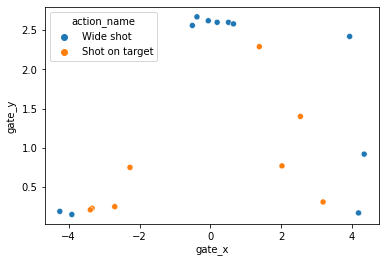

In [15]:
sns.scatterplot(data=shots, x='gate_x', y='gate_y', hue='action_name')

In [16]:
interception = df[df['action_name'].isin(['Good interception of goalkeeper', 'Bad interception of goalkeeper'])][['action_name', 'attack_type_name', 'pos_x', 'pos_y']]

In [17]:
interception['pos_x'] = interception['pos_x'].astype(float)
interception['pos_y'] = interception['pos_y'].astype(float)

<AxesSubplot:xlabel='pos_x', ylabel='pos_y'>

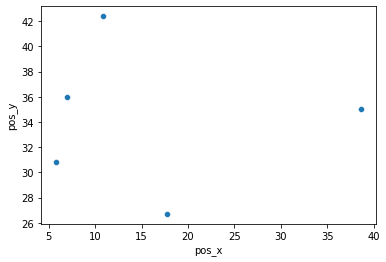

In [18]:
sns.scatterplot(data=interception, x='pos_x', y='pos_y')

In [19]:
interception

,action_name,attack_type_name,pos_x,pos_y
197,Good interception of goalkeeper,Positional attack,38.6,35.0
594,Good interception of goalkeeper,NaN,17.7,26.7
1657,Good interception of goalkeeper,NaN,10.8,42.4
1971,Bad interception of goalkeeper,corner attack,5.8,30.8
1990,Good interception of goalkeeper,NaN,7.0,36.0


In [29]:
# df.iloc[1955:1980, 25:40]
df.iloc[2170:2190, :25]
# df[df['action_name'].isin(['Goal'])].iloc[:, 15:30]

,id,number,action_id,action_name,player_id,player_name,team_id,team_name,position_id,position_name,...,dl,pos_x,pos_y,opponent_id,opponent_name,opponent_team_id,opponent_team_name,opponent_position_id,opponent_position_name,zone_id
2170,21857,NaN,27000,Ball out of the field,NaN,NaN,359,Young Boys,NaN,NaN,...,0,24.40,68.00,NaN,NaN,NaN,NaN,NaN,NaN,3
2171,21858,NaN,1011,Attacking pass accurate,1163345,Armel Zohouri,179,Lausanne Sport,52,Defender - Right,...,0,76.70,0.00,473499,Cameron Puertas,179,Lausanne Sport,24,Midfielder - Left central,8
2172,21859,NaN,22000,Ball receiving,473499,Cameron Puertas,179,Lausanne Sport,24,Midfielder - Left central,...,0,85.40,15.60,NaN,NaN,NaN,NaN,NaN,NaN,11
2173,23397,NaN,21000,Dribbling,473499,Cameron Puertas,179,Lausanne Sport,24,Midfielder - Left central,...,0,85.40,15.60,NaN,NaN,NaN,NaN,NaN,NaN,11
2174,21860,NaN,2051,Successful dribbling,473499,Cameron Puertas,179,Lausanne Sport,24,Midfielder - Left central,...,0,87.20,15.50,200787,Nicolas Brice Moumi Ngamaleu,359,Young Boys,14,Midfielder - Left,11
2175,21861,NaN,4040,Shot blocked,473499,Cameron Puertas,179,Lausanne Sport,24,Midfielder - Left central,...,0,99.80,16.40,199902,David von Ballmoos,359,Young Boys,31,Goalkeeper,14
2176,21862,NaN,6010,Shots blocked,440220,Fabian Rieder,359,Young Boys,43,Defensive midfielder - Right central,...,0,4.90,50.60,NaN,NaN,NaN,NaN,NaN,NaN,4
2177,23736,NaN,32020,Chances created,473499,Cameron Puertas,179,Lausanne Sport,NaN,NaN,...,0,99.80,16.40,NaN,NaN,NaN,NaN,NaN,NaN,14
2178,21867,NaN,3010,Foul,440220,Fabian Rieder,359,Young Boys,43,Defensive midfielder - Right central,...,0,1.80,46.50,NaN,NaN,NaN,NaN,NaN,NaN,4
2179,21869,NaN,19020,Error leading to goal,440220,Fabian Rieder,359,Young Boys,43,Defensive midfielder - Right central,...,0,11.00,34.00,NaN,NaN,NaN,NaN,NaN,NaN,4


# XML Load

In [31]:
xml_file = '/Users/matthiashugli/Dropbox/bucket/sample-data/12-06-2022--UEFA-Nations-LeagueSlovenia-2-2-Serbia20220629-96004-1jtjiu2.xml'

In [32]:
all_events = []
id_iterator = 0
for filename in glob.glob(xml_file):
    prstree = etree.parse(filename)
    root = prstree.getroot()

    event_items = []
    event_subitems = []
    header = ['game_id', 'start', 'end', 'player', 'x_pos', 'y_pos', 'team', 'action', 'half']

    for r in root.iter('ALL_INSTANCES'):
        for inst in r.iter('instance'):
        
            start = inst.find('start').text
            end = inst.find('end').text
            player = inst.find('code').text

            if inst.find('pos_x') != None:
                x_pos = inst.find('pos_x').text
                y_pos = inst.find('pos_y').text
            
            event_items = [start, end, player, x_pos, y_pos]
            
            for label in inst.iter('label'):
                labels = label.find('text').text
                event_items.append(labels)

            all_events.append(event_items)
            event_items.insert(0, id_iterator)
    id_iterator += 1

df = pd.DataFrame(all_events, columns=header)

In [33]:
df.head()

,game_id,start,end,player,x_pos,y_pos,team,action,half
0,0,2.19,22.19,9. Aleksandar Mitrovic,52.4,34.6,Serbia,Positional attacks,1st half
1,0,2.19,22.19,9. Aleksandar Mitrovic,52.4,34.6,Serbia,Passes accurate,1st half
2,0,4.63,24.63,22. Marko Grujic,46.1,43.7,Serbia,Positional attacks,1st half
3,0,4.63,24.63,22. Marko Grujic,46.1,43.7,Serbia,Passes accurate,1st half
4,0,6.52,26.52,15. Milos Veljkovic,30.3,25.8,Serbia,Positional attacks,1st half


In [38]:
df.groupby('player')['game_id'].count()[15:]

player
2. Zan Karnicnik                199
20. Sergej Milinkovic-Savic     125
21. Benjamin Verbic              35
22. Adam Gnezda Gnezda Cerin    198
22. Marko Grujic                146
23. David Brekalo                95
23. Vanja Milinkovic Savic       90
3. Filip Mladenovic              60
3. Gregor Sikosek                86
4. Jure Balkovec                 77
4. Nikola Milenkovic            198
5. Jon Gorenc Stankovic          11
6. Jaka Bijol                   131
6. Nemanja Maksimovic           153
7. Nemanja Radonjic              66
9. Aleksandar Mitrovic          155
9. Andraz Sporar                 90
Start                             2
Name: game_id, dtype: int64

In [41]:
df[df['player'] == '23. Vanja Milinkovic Savic']['action'].unique()

array(['Passes accurate', 'Positional attacks', 'Picking-ups',
       'Goal-kicks', 'Free-kick attacks', 'Air challenges (won)',
       'Challenges (won)', 'Interceptions', 'Supersaves',
       'Shot on target (saved)', 'Goals conceded', 'Passes (inaccurate)',
       'Lost balls', 'Wide shot (Goalkeepers)', 'Counter-attacks',
       'Dribbling'], dtype=object)

In [42]:
df[(df['player'] == '23. Vanja Milinkovic Savic') & (df['action'] == 'Air challenges (won)')]

,game_id,start,end,player,x_pos,y_pos,team,action,half
942,0,1329.22,1349.22,23. Vanja Milinkovic Savic,4.9,19.9,Serbia,Air challenges (won),1st half


In [43]:
df['action'].unique()

array(['Positional attacks', 'Passes accurate', None, 'Challenges (lost)',
       'Tackles (Unsuccessful actions)', 'Dribbles (Successful actions)',
       'Dribbling', 'Lost balls', 'Passes (inaccurate)', 'Fouls',
       'Picking-ups', 'Tackles (Successful actions)',
       'Dribbles (Unsuccessful actions)', 'Challenges (won)',
       'Lost balls (in opp. half)', 'Interceptions',
       'Interceptions (in opp. half)', 'Picking-ups (in opp. half)',
       'Counter-attacks', 'Crosses (inaccurate)',
       'Passes into the penalty box', 'Free-kick attacks',
       'Key passes (accurate)', 'Supersaves', 'Shots', 'Shot on target',
       'Shot on target (saved)', 'Errors', 'Crosses (accurate)',
       'Goal-kicks', 'Air challenges (lost)', 'Air challenges (won)',
       'Assists', 'Goals', 'Goals conceded', 'Errors leading to goal',
       'Key passes (inaccurate)', 'Wide shot', 'Wide shot (Goalkeepers)',
       'Bad ball control', 'Offsides', 'Corner attacks',
       'Throw-in attacks'], 

In [47]:
df[df['action'].isin(['Crosses (accurate)', 'Crosses (inaccurate)'])]

,game_id,start,end,player,x_pos,y_pos,team,action,half
223,0,252.34,272.34,3. Filip Mladenovic,102.3,64.8,Serbia,Crosses (inaccurate),1st half
269,0,349.97,369.97,10. Dusan Tadic,96.0,11.2,Serbia,Crosses (accurate),1st half
373,0,458.81,478.81,3. Filip Mladenovic,97.1,56.5,Serbia,Crosses (accurate),1st half
595,0,843.42,863.42,10. Dusan Tadic,98.0,14.7,Serbia,Crosses (accurate),1st half
826,0,1063.98,1083.98,2. Zan Karnicnik,84.8,6.4,Slovenia,Crosses (accurate),1st half
978,0,1386.91,1406.91,14. Andrija Zivkovic,77.2,13.7,Serbia,Crosses (inaccurate),1st half
995,0,1395.66,1415.66,6. Nemanja Maksimovic,104.7,12.2,Serbia,Crosses (inaccurate),1st half
1396,0,2062.13,2082.13,10. Dusan Tadic,100.8,62.4,Serbia,Crosses (accurate),1st half
1519,0,2284.93,2304.93,14. Andrija Zivkovic,82.9,8.3,Serbia,Crosses (accurate),1st half
1818,0,2812.72,2832.72,3. Filip Mladenovic,84.6,66.5,Serbia,Crosses (inaccurate),1st half
